In [128]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

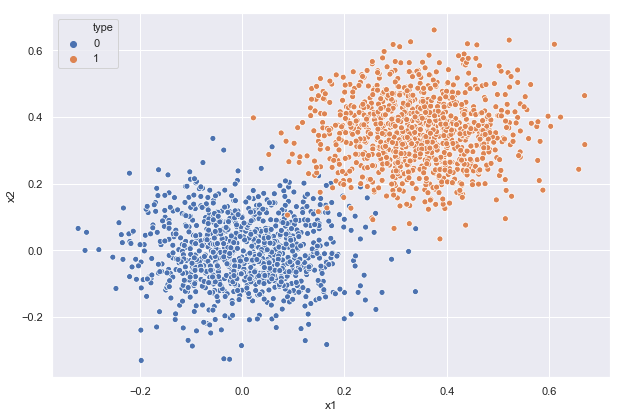

In [129]:
mu_x1, sigma_x1 = 0, 0.1#첫번째 클래스의 평균과 표준편차
x2_mu_diff = 0.35#두번째클래와의 평균의 차이

#createing first distiribution
d1= pd.DataFrame({'x1':np.random.normal(mu_x1,sigma_x1,1000),
                 'x2':np.random.normal(mu_x1,sigma_x1,1000),'type':0})
#creating the second distribution
d2= pd.DataFrame({'x1':np.random.normal(mu_x1,sigma_x1,1000)+x2_mu_diff,
                 'x2':np.random.normal(mu_x1,sigma_x1,1000)+x2_mu_diff,'type':1})

#데이터 두개 붙임
data = pd.concat([d1,d2],ignore_index=True)

#그리기
plt.figure(figsize=(10, 6.7))
ax=sns.scatterplot(x='x1',y='x2',hue='type',data=data)

In [130]:
class Perceptron(object):
    def __init__(self,w0=1,w1=0.1,w2=0.2):
        #weights
        self.w0=w0 #bias
        self.w1=w1
        self.w2=w2
        
    def weighted_sum_inputs(self,x1,x2):
        #weight 합 / bias는 항사이 1이 입력되는 것으로 가정
        return sum([1*self.w0,x1*self.w1,x2*self.w2])
    
    def step_function(self,z):
        if z>=0:
            return 1
        else:
            return 0
        #임의의 값을 가중치의 초기값으로 설정 / 신호젅달여부를 활성화수로 step함수로 사용
    
    def predict(self,x1,x2):
        #결과 예측은 가중치 계산과 activation 함수를 이용해 계산
        z = self.weighted_sum_inputs(x1, x2)
        return self.step_function(z)
    
    def fit(self, X, y, epochs=1, step=0.1, verbose=True): 
        #모형적합
        errors = []
        for epoch in range(epochs):
            #epochs는 모형을 훈련하는 과정(가중치 업데이트)
            error=0
            for i in range(0,len(X.index)):
                x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]
                #the uddate is proportional to the step size and the error
                update = step * (target - self.predict(x1, x2)) 
                self.w1+=update*x1
                self.w2+=update*x2
                self.w0+=update
                error+=int(update!=0.0)
            errors.append(error)
            if verbose:
                print(f'Epochs:{epoch} - Error:{error} - Errors from all epochs: {errors}')
    def predict_boundary(self,x):
        #최종가중치에 따른 경계 결정 = > 2차원 평면의 경우 경계는 직선
        return -(self.w1*x+self.w0)/self.w2

In [131]:
#훈련 데이터셋 구성 : 전체 데이터에서 80%데이터 추출 나머지는 생성된 모형 검증에 사용
#Splitting the dataset in training and test set
msk = np.random.rand(len(data))<0.8
#Roughly 80% of data will go in the training set
train_x,train_y = data[['x1','x2']][msk],data.type[msk]
#Everything else will go into the valitation set
test_x, test_y = data[['x1','x2']][~msk], data.type[~msk]

In [132]:
#퍼셉트론 훈련 : 퍼셉트론 초기 가중치 부여(w1=0.1,w2=0.1)
#퍼셉트론 이론에 의하면 초기가중치에 관계없이 최종모델이 구성됨
#fit시킴(epochs=1,learning rate(step)=0.005)
my_perceptron = Perceptron() 
my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)

Epochs:0 - Error:216 - Errors from all epochs: [216]


In [133]:
#퍼셉트론 예측 : 훈련데이터를 이용하여 생성된 모형에 테스트 데이터를 이용
#confusion matrix를 계산
from sklearn.metrics import confusion_matrix
pred_y=test_x.apply(lambda x:my_perceptron.predict(x.x1,x.x2),axis=1)
cm=confusion_matrix(test_y,pred_y,labels=[0,1])
print(pd.DataFrame(cm,index=['True 0','True 1'],columns=['Predict 0','Predict 1']))

        Predict 0  Predict 1
True 0        193         10
True 1          2        198


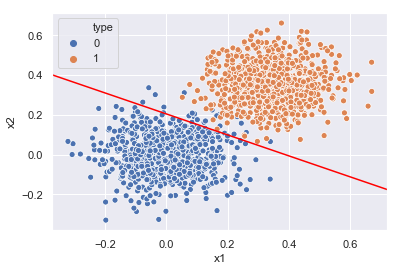

In [140]:
#예측결과 보기 / 결과를 다이아그램으로 표현 
#경계선을 추가하여 성능을 본다
#Adds decision boundary line to the scatterplot
ax = sns.scatterplot(x="x1",y="x2",hue="type",data=data[msk])
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = my_perceptron.predict_boundary(x_vals)
ax.plot(x_vals,y_vals,'-',c="red")

,x1,x2,type
0,-0.001104,-0.024806,0
1,0.035016,-0.268999,0
2,-0.021984,-0.074253,0
3,0.063704,0.002615,0
4,-0.092288,-0.194683,0
5,0.072362,-0.067253,0
7,0.028991,0.019885,0
8,-0.094908,-0.194098,0
9,-0.203496,-0.097080,0
11,-0.142730,-0.076054,0
